<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Applied Machine Learning - Ensemble Modeling Live Training**

Welcome to this hands-on training where you will immerse yourself in applied machine learning in Python where we'll explore model stacking. Using `sklearn.ensemble`, we'll learn how to create layers that are stacking-ready.

The foundations of model stacking:

* Create various types of baseline models, including linear and logistic regression using Scikit-Learn, for comparison to ensemble methods.
* Build layers, then stack them up.
* Calculate performance metrics.

## **1st Dataset**


The first dataset we'll use is a CSV file named `pima-indians-diabetes.csv`, which contains data on females of Pima Indian heritage that are at least 21 years old. It contains the following columns:

- `n_preg`: Number of pregnancies
- `pl_glucose`: Plasma glucose concentration 2 hours after an oral glucose tolerance test
- `dia_bp`: Diastolic blood pressure (mm Hg)
- `tri_thick`: Triceps skin fold thickness (mm)
- `serum_ins`: 2-Hour serum insulin (mu U/ml)
- `bmi`: Body mass index (weight in kg/(height in m)^2)
- `diab_ped`: Diabetes pedigree function
- `age`: Age (years)
- `class`: Class variable (0 or 1)


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read in the dataset as Pandas DataFrame
diabetes = pd.read_csv('https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/data/pima-indians-diabetes.csv?raw=true')

In [3]:
# Look at data using the info() function
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_preg      768 non-null    int64  
 1   pl_glucose  768 non-null    int64  
 2   dia_bp      768 non-null    int64  
 3   tri_thick   768 non-null    int64  
 4   serum_ins   768 non-null    int64  
 5   bmi         768 non-null    float64
 6   diab_ped    768 non-null    float64
 7   age         768 non-null    int64  
 8   class       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Observations:** 
- The `info()` function is critical to beginning to understand your data.  Here, there are no missing values.  However, that is not typical.
- There is a mixture of integers and floats with the first 5 columns being `int64`, the next 2 `float64` and the last 2 'int64`.

In [4]:
# Look at data using the describe() function
diabetes.describe()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Observations:** 
- The `.describe()` function gives the summary statistics of the data.  Notice that the min of the 1st six columns is zero.  Even though there are no missing values, this is indicative of the measurements for those features having not been captured.
- Although we previously saw there is a mixture of integer and float data types (as seen with `.info()`), the printout makes it appear as if all values are float.  

In [5]:
# Print the first 5 rows of the data using the head() function
diabetes.head()

,n_preg,pl_glucose,dia_bp,tri_thick,serum_ins,bmi,diab_ped,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Observation:**
- Printing out the first 5 rows, we see that the data types of the columns are indeed as stated previously.

In [6]:
# Convert Pandas DataFrame to numpy array - Return only the values of the DataFrame with DataFrame.to_numpy()
diabetes = diabetes.to_numpy()

### Always verify that your X matrix and target array have the same number of rows to avoid errors during model training.

In [7]:
# Create X matrix and y (target) array using slicing [row_start:row_end, col_start:target_col],[row_start:row_end, target_col]
X, y = diabetes[:, :-1], diabetes[:, -1]

# Print X matrix and y (target) array dimensions using .shape 
print('Shape: %s, %s' % (X.shape, y.shape))

Shape: (768, 8), (768,)


In [8]:
# ALWAYS set a seed for reproducibility!  Do this using np.random.seed()
np.random.seed(42)

In [9]:
# Convert X matrix data types to 'float32' for consistency using .astype()
X = X.astype('float32')

# Convert y (target) array to 'str' using .astype()
y = y.astype('str')

# Encode class labels in y array using dot notation with LabelEncoder().fit_transform()
# Hint: y goes in the fit_transform function call
y = LabelEncoder().fit_transform(y)

### Don't let the `.astype('str')` throw you!  This is simply taking the class labels and label encoding them – regardless of their original format.

## **Creating a Naive Classifier**
Here we'll use the `DummyClassifier` from `sklearn` and set the `strategy` argument to `most_frequent`.  This creates a so-called 'naive' classifer and is simply a model that predicts a single class for all of the rows, regardless of their original class.  

`DummyClassifier` arguments:
- `strategy`: Strategy to use to generate predictions.

`RepeatedStratifiedKFold` arguments:
- `n_splits`: Number of folds.
- `n_repeats`: Number of times cross-validator needs to be repeated.
- `random_state`: Controls the generation of the random states for each repetition. Pass an int for reproducible output across multiple function calls.  (This is an equivalent argument to np.random.seed above, but will be specific to this naive model.)

`cross_val_score` arguments:
- The model to use.
- The data to fit. (X)
- The target variable to try to predict. (y)
- `scoring`: A single string scorer callable object/function such as 'accuracy' or 'roc_auc'.  See https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for more options.
- `cv`: Cross-validation splitting strategy (default is 5)
- `error_score`: Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised.

Next we'll use the `cross_val_score` function to evaluate the naive model we have instantiated, passing in the model name, our X matrix and target array, setting the `scoring` argument to use `accuracy`, the `cv` argument to the cross-validation from the previous line, and `error_score` to raise an error in the event of an error during calculation.

Lastly, we'll print out the mean score and its standard deviation to give us a naive baseline from which we'll seek to improve our model upon.

In [12]:
# Evaluate naive

# Instantiate a DummyClassifier with 'most_frequent' strategy
naive = DummyClassifier(strategy='most_frequent')

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable,
# 'accuracy' scoring, cross validator, and error_score set to 'raise'
n_scores = cross_val_score(naive, X, y, scoring='accuracy', cv=cv, error_score='raise')

# Print mean and standard deviation of n_scores: 
print('Naive score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Naive score: 0.651 (0.003)


## **Observation** 
- We want to do better than 65% accuracy to consider any other models as an improvement to a totally naive model.

## **Creating a Baseline Classifier**
Now we'll create a baseline classifier, one that seeks to correctly predict the class that each observation belongs to.  Since the target variable is binary, we'll instantiate a `LogisticRegression` model, set the `solver` argument to `lbfgs` and `penalty` to `l2`.  

- The `lbfgs` solver finds a (local) minimum of an objective function by using the gradient and values of the objective function.
- The `l2` penalty is equivalent to Ridge Regression, shrinking the coefficients of the less important features toward (but not to) zero.

In [11]:
# Evaluate model
model = LogisticRegression(solver='lbfgs',penalty='l2')
m_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Baseline score: %.3f (%.3f)' % (np.mean(m_scores), np.std(m_scores)))

Baseline score: 0.773 (0.040)


## **Observation**
- We want to do better than 77% with a Stacking Classifier to consider it an improvement over this baseline logistic regression model.

## **Getting started with Stacking Classifier**

- We're going to compare several additional baseline classifiers to see if they perform better than Logistic Regression we just trained previously.
- We'll start by importing additional packages that we'll need.

In [154]:
# Compare ensemble to each baseline classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

## Defining the layers with:
- layer 1 being instantiation of all our baseline classifiers
- layer 2 being instantiation of our 'meta' learner, Logistic Regression
- assigning our `StackingClassifier` to the `model` variable passing the arguments `estimators` which is our list of baseline classifiers, `final_estimator` our meta classifier, and `cv` a value of 5 for a 5-fold cross validation.

In [1]:
# Create the stacking ensemble of models
def get_stacking():
	# Define the base models
  layer1 = list()
  layer1.append(('LR', LogisticRegression()))
  layer1.append(('KNN', KNeighborsClassifier()))
  layer1.append(('DT', DecisionTreeClassifier()))
  layer1.append(('SVM', SVC()))
  layer1.append(('Bayes', GaussianNB()))
  # Define meta learner model
  layer2 = LogisticRegression()
	# Define stacking classifier with the meta learner
  model = StackingClassifier(estimators=layer1, final_estimator=layer2, cv=5)
  return model

## Create a key:value pair dictionary that will:
- have the key as the name of the model 
- the value as the model instantiation (with no arguments) 
- the final (Stacking) calling the `get_stacking`() function we just created.

In [2]:
# Create dictionary of models to evaluate
def get_models():
  models = dict()
  models['LR'] = LogisticRegression() 
  models['KNN'] = KNeighborsClassifier() 
  models['DT'] = DecisionTreeClassifier()
  models['SVM'] = SVC()
  models['Bayes'] = GaussianNB()
  models['Stacking'] = get_stacking()
  return models

## Define another custom function called `evaluate_model` that:
- evaluates each model using `RepeatStratifiedKFold` cross-validation
- returns the `accuracy` using the `cross_val_score` function

In [160]:
# Evaluate a given model using Cross-Validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

In [161]:
# get the models to evaluate
models = get_models()

>LR 0.831 (0.045)
>KNN 0.734 (0.062)
>DT 0.670 (0.068)
>SVM 0.815 (0.048)
>Bayes 0.816 (0.049)
>Stacking 0.831 (0.044)


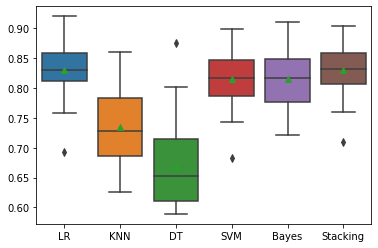

In [162]:
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot model performance for comparison
sns.boxplot(x=names, y=results, showmeans=True)

In [167]:
import warnings
warnings.filterwarnings("ignore")
# Fit the model on all available data
model.fit(X, y)
# Make a prediction for one example
data = X[1].reshape(1, -1)
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))
print('Actual Class: %d' % (y[1]))

Predicted Class: 0
Actual Class: 0


## **2nd Dataset**


The second dataset we'll use is a CSV file named `abalone.csv`, which contains data on physicak measurements of abalone shells used to determine the age of the abalone.  It contains the following columns:

- `Sex`: M, F, and I (infant) - (removed for our purposes)
- `Length`: Longest shell measurement (mm)
- `Diameter`: Perpendicular to length (mm)
- `Height`: with meat in shell (mm)
- `Whole weight`: whole abalone (grams)
- `Shucked weight`: weight of meat (grams)
- `Viscera weight`: gut weight (grams)
- `Shell weight`: after being dried (grams)
- `Rings`: +1.5 gives the age in years

	

### **Get the dataset**

In [6]:
# Read in the dataset
abalone = pd.read_csv('https://github.com/datacamp/Applied-Machine-Learning-Ensemble-Modeling-live-training/blob/master/data/abalone.csv?raw=true')

# Print header
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7    Shell weight   4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## **Getting started with Stacking Regressor**

In [8]:
# baseline and good result for Abalone
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

In [9]:
data = abalone.values
X, y = data[:, 1:-1], data[:, -1]
print('Shape: %s, %s' % (X.shape,y.shape))

Shape: (4177, 7), (4177,)


In [10]:
# minimally prepare dataset
y = y.astype('float32')

In [20]:
# evaluate naive
naive = DummyRegressor(strategy='median')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(naive, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores = absolute(n_scores)
print('Baseline: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Baseline: 2.372 (0.119)


In [12]:
# evaluate model
model = SVR(kernel='rbf',gamma='scale',C=10)
m_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
m_scores = absolute(m_scores)
print('Good: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Good: 1.483 (0.075)


In [13]:
# Compare machine learning models for regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [14]:
# Get a list of models to evaluate
def get_models():
  models = dict()
  models['KNN'] = KNeighborsRegressor()
  models['DT'] = DecisionTreeRegressor()
  models['SVM'] = SVR()
  models['Stacking'] = get_stacking()
  return models

In [15]:
# Create a stacking ensemble of models
def get_stacking():
	# Define the base models
	layer1 = list()
	layer1.append(('KNN', KNeighborsRegressor()))
	layer1.append(('DT', DecisionTreeRegressor()))
	layer1.append(('SVM', SVR()))
	# Define meta learner model
	layer2 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=layer1, final_estimator=layer2, cv=5)
	return model

In [16]:
# Evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [17]:
# Get the models to evaluate
models = get_models()

>KNN -1.597 (0.064)
>DT -2.096 (0.111)
>SVM -1.518 (0.077)
>Stacking -1.536 (0.069)


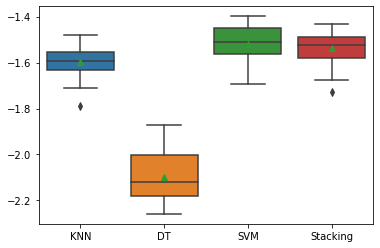

In [209]:
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot model performance for comparison
sns.boxplot(x=names, y=results, showmeans=True)

### **Double Stacking - 2 Layers**

In [224]:
# Create a stacking ensemble of models
def get_stacking():
	# Define the base models
  layer1, layer2 = list(), list()
  layer1.append(('KNN', KNeighborsRegressor()))
  layer1.append(('DT', DecisionTreeRegressor()))
  layer1.append(('SVM', SVR()))
  layer2.append(('KNN', KNeighborsRegressor()))
  layer2.append(('DT', DecisionTreeRegressor()))
  layer2.append(('SVM', SVR()))
	# Define meta learner model
  layer3 = StackingRegressor(estimators=layer2, final_estimator=LinearRegression(), cv=5)
	# define the stacking ensemble
  model = StackingRegressor(estimators=layer1, final_estimator=layer3, cv=5)
  return model

In [225]:
# Get the models to evaluate
models = get_models()

>KNN -1.597 (0.064)
>DT -2.101 (0.115)
>SVM -1.518 (0.077)
>Stacking -1.545 (0.074)


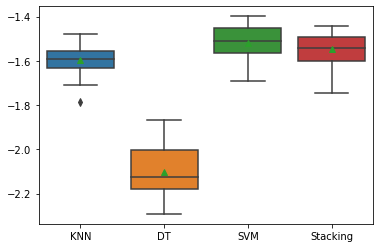

In [226]:
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot model performance for comparison
sns.boxplot(x=names, y=results, showmeans=True)